In [42]:
import pandas as pd

# Specify the path to CSV file
csv_file_path = 'C:/Users/YOGA/Downloads/Traffic_Volume_Viewer_-_2024_Data.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(csv_file_path)

# Display the DataFrame
print(df)

                                               the_geom station_id  \
0     0101000020E6100000C77F812040E66240E0D6DD3CD5EF...      02413   
1     0101000020E6100000C77F812040E66240E0D6DD3CD5EF...      02413   
2     0101000020E6100000C77F812040E66240E0D6DD3CD5EF...      02413   
3     0101000020E6100000C77F812040E66240E0D6DD3CD5EF...      02413   
4     0101000020E6100000C77F812040E66240E0D6DD3CD5EF...      02413   
...                                                 ...        ...   
4078  0101000020E61000008AC91B6066C062404128EFE3685A...      T0496   
4079  0101000020E61000008AC91B6066C062404128EFE3685A...      T0496   
4080  0101000020E61000008AC91B6066C062404128EFE3685A...      T0496   
4081  0101000020E61000008AC91B6066C062404128EFE3685A...      T0496   
4082  0101000020E61000008AC91B6066C062404128EFE3685A...      T0496   

              road_name   suburb cardinal_direction_name classification_type  \
0          Allen Street  Pyrmont                   NORTH        UNCLASSIFIED   

In [43]:
# Create new df with selected columns
selected_columns = ['road_name','suburb', 'cardinal_direction_name','classification_type', 'period', 'traffic_count']
new_df = df[selected_columns]

In [44]:
# List of filtered values
selected_type = ['UNCLASSIFIED', 'ALL VEHICLES']
selected_period = ['AM PEAK','PM PEAK','OFF PEAK']

# Filter data based on conditions
filtered_df = new_df[(new_df['period'].isin(selected_period)) & (df['classification_type'].isin(selected_type))]

Box Values:
[array([2107.25, 2107.25, 8317.5 , 8317.5 , 2107.25]), array([ 2629.5,  2629.5, 11175. , 11175. ,  2629.5]), array([ 5051.75,  5051.75, 20402.  , 20402.  ,  5051.75])]

Median Values:
[4044.5, 4712.0, 8573.5]

Whisker Values:
[array([2107.25,  680.  ]), array([ 8317.5, 17358. ]), array([2629.5,  561. ]), array([11175., 22976.]), array([5051.75, 1362.  ]), array([20402., 35582.])]


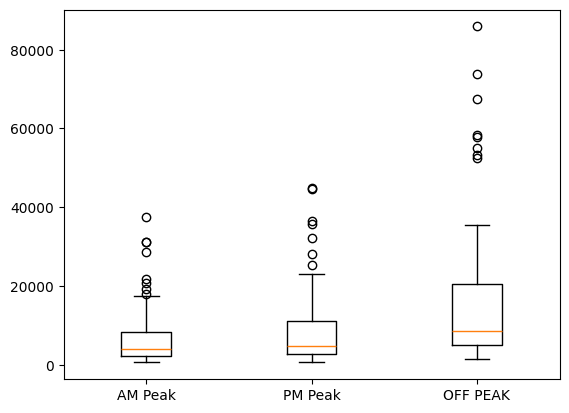

In [45]:
# Groupby suburb and time period to find vehicle counts
rouped_df = filtered_df.groupby(['suburb', 'period'])['traffic_count'].sum().reset_index(name='vehicle_count')

import matplotlib.pyplot as plt

grouped_df2 = pd.DataFrame(grouped_df)

# Create a box plot
boxplot_dict = plt.boxplot([grouped_df2[grouped_df2['period'] == 'AM PEAK']['vehicle_count'], 
                            grouped_df2[grouped_df2['period'] == 'PM PEAK']['vehicle_count'],
                            grouped_df2[grouped_df2['period'] == 'OFF PEAK']['vehicle_count']],
                           labels=['AM Peak', 'PM Peak','OFF PEAK'])

# Extract boxplot values
box_values = [item.get_ydata() for item in boxplot_dict['boxes']]
median_values = [item.get_ydata()[0] for item in boxplot_dict['medians']]
whisker_values = [item.get_ydata() for item in boxplot_dict['whiskers']]

# Display the extracted values
print("Box Values:")
print(box_values)
print("\nMedian Values:")
print(median_values)
print("\nWhisker Values:")
print(whisker_values)

In [46]:
# Data summary
grouped_df2.describe()

,vehicle_count
count,252.000000
mean,10374.730159
std,12996.772092
min,561.000000
25%,2868.750000
50%,5261.500000
75%,11773.000000
max,85916.000000


In [47]:
import numpy as np
# Define a condition based on the values of the vehicle counts
condition_high = grouped_df['vehicle_count'] > 11773
condition_low = grouped_df['vehicle_count'] < 2869 


# Create a new column 'traffic_condition' based on the conditions
grouped_df['traffic_condition'] = np.where(condition_high, 'High', np.where(condition_low, 'Low', 'Moderate'))

In [48]:
# Select only the columns needed to add from main
columns_to_add = ['wgs84_latitude', 'wgs84_longitude']
df_selected = df[['suburb'] + columns_to_add]

# Merge dataframes based on the 'suburb' column (left merge to keep all rows from grouped_df)
merged_df = pd.merge(grouped_df,df_selected, on='suburb', how='left')

In [49]:
import plotly.express as px

# Create an interactive map with Plotly
fig = px.scatter_mapbox(merged_df, lat='wgs84_latitude', lon='wgs84_longitude', color='traffic_condition', size='vehicle_count',
                        hover_data=['period','traffic_condition','vehicle_count'], zoom=10)

# Customize the map layout
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r": 0, "t": 0, "l": 0, "b": 0})

# Show the map
fig.show()